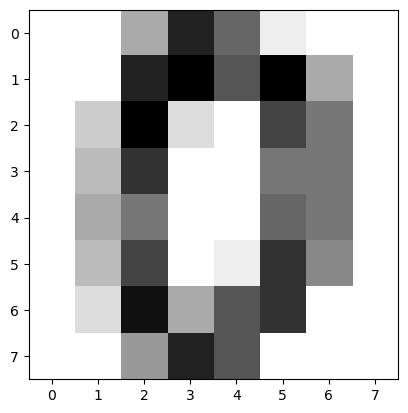

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [8]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# 이미지를 평판화 n x sample x 8 8 => n_sample x 64

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(digits.target)

Y = pd.get_dummies(y1).values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=0)

In [13]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437, 10)
X test : (360, 64)
y test : (360, 10)


In [20]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(128,input_shape=(64,),activation='ReLU'))
model.add(Dense(128,activation='ReLU'))
model.add(Dense(112,activation='ReLU'))
model.add(Dense(96,activation='ReLU'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(lr=0.0045),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 112)               14448     
                                                                 
 dense_13 (Dense)            (None, 96)                10848     
                                                                 
 dense_14 (Dense)            (None, 10)                970       
                                                                 
Total params: 51,098
Trainable params: 51,098
Non-trainable params: 0
_________________________________________________________________


C:\Users\charl\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
45/45 [==============================] - 2s 12ms/step - loss: 0.8347 - accuracy: 0.7578 - val_loss: 0.1785 - val_accuracy: 0.9528
Epoch 2/100
45/45 [==============================] - 0s 5ms/step - loss: 0.1654 - accuracy: 0.9471 - val_loss: 0.1020 - val_accuracy: 0.9722
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 0.1027 - accuracy: 0.9687 - val_loss: 0.1368 - val_accuracy: 0.9500
Epoch 4/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.2647 - val_accuracy: 0.9194
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 0.1122 - accuracy: 0.9659 - val_loss: 0.1228 - val_accuracy: 0.9667
Epoch 6/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0994 - accuracy: 0.9756 - val_loss: 0.1266 - val_accuracy: 0.9694
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 0.1262 - accuracy: 0.9610 - val_loss: 0.1482 - val_accuracy: 0.9556
Epoch 8/100


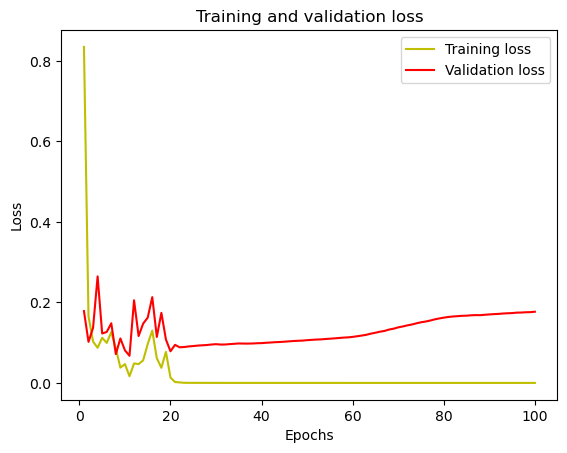

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

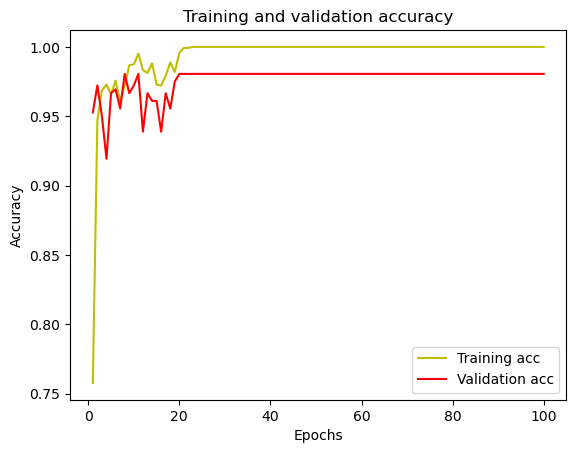

In [23]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.94      0.94        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      0.97      0.99        39
           8       0.97      0.97      0.97        39
           9       0.95      0.98      0.96        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  1]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0